In [28]:
import os
import pandas as pd
import numpy as np
import pyemu
import matplotlib.pyplot as plt
import subprocess

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [10]:
ml_ws = os.path.join('..', '2022_03_16_ies')
pest_ws = os.path.join(ml_ws, 'pest')
postproc_ws = os.path.join(ml_ws, 'runmodel', 'postproc')

In [20]:
phi = pd.read_csv(os.path.join(pest_ws, 'ies-postcalib.phi.actual.csv'),index_col=0)
phi.index = phi.total_runs

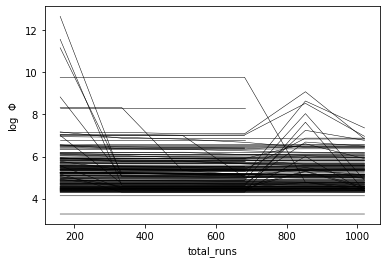

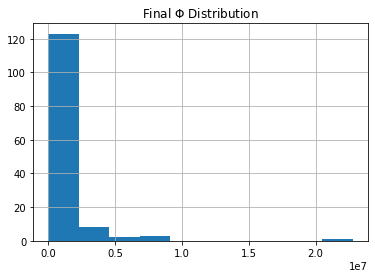

In [21]:
phi.iloc[:,6:].apply(np.log10).plot(legend=False,lw=0.5,color='k')
plt.ylabel('log  $\Phi$ ')
plt.figure()
phi.iloc[-1,6:].hist()
plt.title('Final $\Phi$ Distribution');

In [22]:
phi

,total_runs,mean,standard_deviation,min,max,0,1,2,3,4,...,190,191,192,193,194,195,196,197,198,base
total_runs,,,,,,,,,,,,,,,,,,,,,
160,160,3.130780e+10,3.562220e+11,1875.69,4.492040e+12,238604,45846.1,NaN,2303660.0,72281.5,...,26408.2,341944,722205,25141.9,279183,49557.4,4.492040e+12,3.654230e+11,11402200.0,1875.69
334,334,3.953210e+07,4.574820e+08,1875.76,5.782750e+09,238779,46227.4,NaN,2303660.0,72281.5,...,26286.7,316626,683518,25043.3,265434,49375.8,1.103500e+05,4.341250e+04,11402200.0,1875.76
506,506,3.817980e+07,4.572920e+08,1875.63,5.782750e+09,225452,46227.4,NaN,2303660.0,72547.1,...,26344.7,316626,656204,25043.3,247678,49175.7,1.067770e+05,4.341250e+04,10328800.0,1875.63
681,681,3.809820e+07,4.572980e+08,1875.54,5.782750e+09,215704,46227.4,NaN,2303660.0,72680.1,...,26307.0,316626,656204,25043.3,236456,48863.1,9.770600e+04,4.324620e+04,10543000.0,1875.54
853,853,1.592050e+07,1.109520e+08,1875.50,1.186950e+09,204691,45164.4,NaN,3090700.0,NaN,...,26127.5,358198,635905,30229.1,224198,48670.4,1.236850e+05,4.314850e+04,334815000.0,1875.50
1020,1020,8.147950e+05,2.396920e+06,1875.54,2.277910e+07,204079,45125.6,NaN,3090700.0,NaN,...,26287.8,358696,635905,25116.1,224238,48647.5,9.469150e+04,4.314030e+04,9088830.0,1875.54


In [23]:
phi.iloc[:,6:]

,1,2,3,4,5,6,7,8,9,10,...,190,191,192,193,194,195,196,197,198,base
total_runs,,,,,,,,,,,,,,,,,,,,,
160,45846.1,NaN,2303660.0,72281.5,29930.4,49449.0,331776,63710.0,329568,NaN,...,26408.2,341944,722205,25141.9,279183,49557.4,4.492040e+12,3.654230e+11,11402200.0,1875.69
334,46227.4,NaN,2303660.0,72281.5,29925.5,49449.0,324040,62446.2,277186,NaN,...,26286.7,316626,683518,25043.3,265434,49375.8,1.103500e+05,4.341250e+04,11402200.0,1875.76
506,46227.4,NaN,2303660.0,72547.1,30926.4,49368.7,322379,62295.0,276286,NaN,...,26344.7,316626,656204,25043.3,247678,49175.7,1.067770e+05,4.341250e+04,10328800.0,1875.63
681,46227.4,NaN,2303660.0,72680.1,30083.1,49272.1,317873,62161.0,275642,NaN,...,26307.0,316626,656204,25043.3,236456,48863.1,9.770600e+04,4.324620e+04,10543000.0,1875.54
853,45164.4,NaN,3090700.0,NaN,29999.8,49348.8,315777,62136.1,274958,NaN,...,26127.5,358198,635905,30229.1,224198,48670.4,1.236850e+05,4.314850e+04,334815000.0,1875.50
1020,45125.6,NaN,3090700.0,NaN,30114.4,49288.3,315692,62114.5,274958,NaN,...,26287.8,358696,635905,25116.1,224238,48647.5,9.469150e+04,4.314030e+04,9088830.0,1875.54


In [24]:
meas_head = pyemu.smp_utils.smp_to_dataframe(os.path.join(postproc_ws, 'obs-head-all.ssf'))

In [29]:
# Errors pertaining to NOBS, NOBSGP and NINSFILE are irrelevant.
# They will be adressed in the next notebook.
p = subprocess.run(['i64jcb2csv', 'ies-postcalib.0.obs.jcb', 'ies-postcalib.0.obs.csv', 'nt'], cwd=pest_ws, stdout=subprocess.PIPE, text=True)
for row in p.stdout.split('\n'):
    print(row)


 JCB2CSV version 17.3. Watermark Numerical Computing.
 
 - reading binary matrix file ies-postcalib.0.obs.jcb...
 - binary matrix file ies-postcalib.0.obs.jcb read ok.
 - file ies-postcalib.0.obs.csv written ok.



In [30]:
# Errors pertaining to NOBS, NOBSGP and NINSFILE are irrelevant.
# They will be adressed in the next notebook.
p = subprocess.run(['i64jcb2csv', 'ies-postcalib.5.obs.jcb', 'ies-postcalib.5.obs.csv', 'nt'], cwd=pest_ws, stdout=subprocess.PIPE, text=True)
for row in p.stdout.split('\n'):
    print(row)


 JCB2CSV version 17.3. Watermark Numerical Computing.
 
 - reading binary matrix file ies-postcalib.5.obs.jcb...
 - binary matrix file ies-postcalib.5.obs.jcb read ok.
 - file ies-postcalib.5.obs.csv written ok.



In [31]:
oe_pr = pd.read_csv(os.path.join(pest_ws, 'ies-postcalib.0.obs.csv'), index_col=0)
oe_pt = pd.read_csv(os.path.join(pest_ws, 'ies-postcalib.5.obs.csv'), index_col=0)

c:\users\nat12nho\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [32]:
oe_pr

,b10-1_1,b10-1_2,b10-1_3,b10-1_4,b14-1_1,b14-1_2,b14-1_3,b15-1_1,b15-1_2,b15-1_3,...,of-262_204,of-262_205,of-262_206,of-262_207,of-262_208,of-262_209,of-262_210,of-262_211,of-262_212,of-262_213
0,134.3372,135.2918,136.2448,137.1365,142.7376,142.8820,142.7170,142.5017,142.6258,142.4720,...,-1.201929e+05,-132719.60,-1.230695e+05,-1.119621e+05,-1.089120e+05,-8.401505e+04,-9.022007e+04,-8.980466e+04,-8.973200e+04,-1.114920e+05
1,131.0376,130.8426,131.0553,130.8519,140.3854,139.7259,140.4588,140.3742,139.7895,140.4462,...,-6.916512e+04,-47065.14,-1.686406e+04,-4.783848e+04,-4.530334e+04,-4.031952e+04,-9.654531e+04,-6.687805e+04,-3.506818e+04,-2.448387e+04
3,135.7065,135.7384,135.8240,135.7692,141.6761,141.7181,141.7922,141.8359,141.8746,141.9431,...,-8.475659e+04,-45098.68,-4.572965e+04,-1.099185e+05,-1.117091e+05,-1.113454e+05,-1.124785e+05,-6.930716e+04,-4.559793e+04,-3.598535e+04
4,132.5303,132.8078,132.6908,132.6994,142.7775,142.8102,142.7420,143.1214,143.1570,143.0937,...,-8.319289e+04,-33868.17,-6.145141e+04,-9.573948e+04,-3.604457e+04,-5.927626e+04,-8.846001e+04,-3.382963e+04,-2.746435e+04,-2.290745e+04
5,130.3568,130.9195,131.8935,132.7961,140.8550,140.8348,140.8047,141.1193,141.1026,141.0781,...,-1.770159e+04,-17894.99,-1.329601e+04,-5.008655e+04,-2.942232e+04,-9.263189e+04,-9.373881e+04,-5.863901e+04,-1.930670e+04,-2.472076e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,137.2024,137.3588,137.4019,137.4445,141.4522,141.7495,141.6134,141.5822,141.9284,141.7977,...,-1.223175e+05,-51288.51,-5.810787e+04,-4.814690e+04,-7.855640e+04,-1.176719e+05,-1.219614e+05,-1.229932e+05,-1.218623e+05,-1.213944e+05
196,151.1981,162.2082,174.9232,161.7502,148.4631,153.5173,160.7481,148.1798,153.0757,160.1614,...,-1.727206e+08,-15807365.00,-2.881263e+08,-1.075559e+09,-6.642901e+08,-1.007507e+09,-1.597108e+09,-4.386390e+08,-3.190636e+08,-3.382076e+08
197,143.6122,150.8681,159.7084,150.6601,144.6064,147.1490,151.2086,143.5445,145.3513,148.7266,...,-5.051398e+07,-4635020.00,-8.427673e+07,-3.145821e+08,-1.943334e+08,-2.947069e+08,-4.671157e+08,-1.282632e+08,-9.327564e+07,-9.891075e+07
198,132.2366,132.2262,132.2277,132.2299,167.4191,167.4302,167.4933,173.7946,173.8120,173.8916,...,-1.514200e+05,-151362.60,-1.513459e+05,-1.569936e+05,-1.545216e+05,-1.558353e+05,-1.681019e+05,-1.609667e+05,-1.846698e+05,-1.909229e+05


In [ ]:
for i 

In [ ]:
bulk_predictions = {
    'bound1': 
}

In [65]:
prediction = 'flux-bound6_100'

<AxesSubplot:>

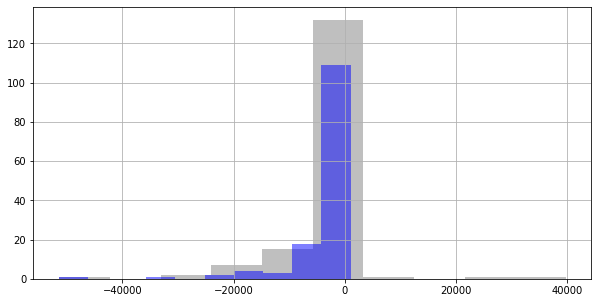

In [66]:
fig,ax = plt.subplots(1,1,figsize=(10,5))
oe_pr.loc[:,prediction].hist(ax=ax, color='0.5',alpha=0.5, label='prior')
oe_pt.loc[:,prediction].hist(ax=ax, color='b',alpha=0.5, label='posterior')

In [20]:
oe_pr.loc[:,'flux-bound1_1']

0         229.2280
1      -14037.6400
2        1379.5280
3        1637.1580
5         441.9846
           ...    
494    -13217.9500
495      2084.9870
497      1288.0240
498    -20194.7800
base     2430.6830
Name: flux-bound1_1, Length: 468, dtype: float64

In [19]:
for column in oe_pr.columns:
    if 'flux' in column:
        print(column)

flux-bound1_1
flux-bound1_2
flux-bound1_3
flux-bound1_4
flux-bound1_5
flux-bound1_6
flux-bound1_7
flux-bound1_8
flux-bound1_9
flux-bound1_10
flux-bound1_11
flux-bound1_12
flux-bound1_13
flux-bound1_14
flux-bound1_15
flux-bound1_16
flux-bound1_17
flux-bound1_18
flux-bound1_19
flux-bound1_20
flux-bound1_21
flux-bound1_22
flux-bound1_23
flux-bound1_24
flux-bound1_25
flux-bound1_26
flux-bound1_27
flux-bound1_28
flux-bound1_29
flux-bound1_30
flux-bound1_31
flux-bound1_32
flux-bound1_33
flux-bound1_34
flux-bound1_35
flux-bound1_36
flux-bound1_37
flux-bound1_38
flux-bound1_39
flux-bound1_40
flux-bound1_41
flux-bound1_42
flux-bound1_43
flux-bound1_44
flux-bound1_45
flux-bound1_46
flux-bound1_47
flux-bound1_48
flux-bound1_49
flux-bound1_50
flux-bound1_51
flux-bound1_52
flux-bound1_53
flux-bound1_54
flux-bound1_55
flux-bound1_56
flux-bound1_57
flux-bound1_58
flux-bound1_59
flux-bound1_60
flux-bound1_61
flux-bound1_62
flux-bound1_63
flux-bound1_64
flux-bound1_65
flux-bound1_66
flux-bound1_67
flux

flux-bound10_17
flux-bound10_18
flux-bound10_19
flux-bound10_20
flux-bound10_21
flux-bound10_22
flux-bound10_23
flux-bound10_24
flux-bound10_25
flux-bound10_26
flux-bound10_27
flux-bound10_28
flux-bound10_29
flux-bound10_30
flux-bound10_31
flux-bound10_32
flux-bound10_33
flux-bound10_34
flux-bound10_35
flux-bound10_36
flux-bound10_37
flux-bound10_38
flux-bound10_39
flux-bound10_40
flux-bound10_41
flux-bound10_42
flux-bound10_43
flux-bound10_44
flux-bound10_45
flux-bound10_46
flux-bound10_47
flux-bound10_48
flux-bound10_49
flux-bound10_50
flux-bound10_51
flux-bound10_52
flux-bound10_53
flux-bound10_54
flux-bound10_55
flux-bound10_56
flux-bound10_57
flux-bound10_58
flux-bound10_59
flux-bound10_60
flux-bound10_61
flux-bound10_62
flux-bound10_63
flux-bound10_64
flux-bound10_65
flux-bound10_66
flux-bound10_67
flux-bound10_68
flux-bound10_69
flux-bound10_70
flux-bound10_71
flux-bound10_72
flux-bound10_73
flux-bound10_74
flux-bound10_75
flux-bound10_76
flux-bound10_77
flux-bound10_78
flux-bou